## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## DataSet 資料集
https://www.cs.toronto.edu/~kriz/cifar.html

## Reference

https://keras-zh.readthedocs.io/models/sequential/#sequential-api

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder


## 資料最佳化步驟 - 資料正規化


In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape) #(50000, 32, 32, 3)
print(y_train.shape) #(50000, 32, 32, 3)
print(y_train[105])

## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 

(50000, 32, 32, 3)
(50000, 1)
[1]


## One hot encoding

原始資料是有序離散值的話 => Label Encoding

原始資料是無序離散值的話 => One Hot Encoding (Dummies)

Ref: https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87



In [26]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
print("Before one hot encoding:")
print(y_train.shape)
print(y_train)
one_hot=OneHotEncoder()
y_train=one_hot.fit_transform(y_train).toarray()
y_test=one_hot.transform(y_test).toarray()
print("After one hot encoding:")
print(y_train.shape)
print(y_train)

Before one hot encoding:
(50000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
After one hot encoding:
(50000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [27]:

classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(32,32,3),activation='relu'))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())


#卷積組合
classifier.add(Convolution2D(32, kernel_size=(3,3), input_shape=(32,32,3),activation='relu'))
classifier.add(BatchNormalization())

'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D(pool_size=(2,2)))

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(100,activation='relu')) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(10,activation='softmax'))

#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=1000,epochs=100)

Epoch 1/100
50/50 [==============================] - 120s 2s/step - loss: 1.6581 - accuracy: 0.4306
Epoch 2/100
50/50 [==============================] - 117s 2s/step - loss: 1.1571 - accuracy: 0.5899
Epoch 3/100
50/50 [==============================] - 112s 2s/step - loss: 0.9514 - accuracy: 0.6677
Epoch 4/100
50/50 [==============================] - 136s 3s/step - loss: 0.8022 - accuracy: 0.7237
Epoch 5/100
50/50 [==============================] - 137s 3s/step - loss: 0.6584 - accuracy: 0.7736
Epoch 6/100
50/50 [==============================] - 135s 3s/step - loss: 0.5409 - accuracy: 0.8170
Epoch 7/100
50/50 [==============================] - 134s 3s/step - loss: 0.4235 - accuracy: 0.8619
Epoch 8/100
50/50 [==============================] - 138s 3s/step - loss: 0.3158 - accuracy: 0.9037
Epoch 9/100
50/50 [==============================] - 126s 3s/step - loss: 0.2200 - accuracy: 0.9408
Epoch 10/100
50/50 [==============================] - 109s 2s/step - loss: 0.1428 - accuracy: 0.9688

In [ ]:
x_train

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

[  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]


,預測結果
airplane,0.00%
automobile,0.00%
bird,0.00%
cat,0.00%
deer,0.00%
dog,0.00%
frog,0.00%
horse,100.00%
ship,0.00%
truck,0.00%


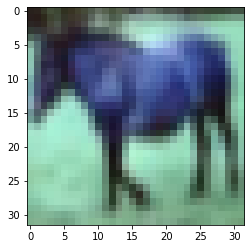

In [98]:
import cv2
from matplotlib import pyplot as plt
import pandas as pd

# 輸入新圖片
# img = cv2.imread("data/Day015_airplane.png")
# img = cv2.imread("data/Day015_car.png")
# img = cv2.imread("data/Day015_bird.png")
# img = cv2.imread("data/Day015_cat.png")
# img = cv2.imread("data/Day015_deer.png")
# img = cv2.imread("data/Day015_dog3.png")
# img = cv2.imread("data/Day015_frog.png")
img = cv2.imread("data/Day015_horse.png")
# img = cv2.imread("data/Day015_ship.png")
# img = cv2.imread("data/Day015_truck.png")
img = cv2.resize(img, (32,32), interpolation = cv2.INTER_BITS) 
plt.imshow(img)

# 前處理 + 預測
input_example=(np.array([img])-mean_train)/(std_train+1e-7) 
result = classifier.predict(input_example)

# 輸出預測結果
np.set_printoptions(precision=3, suppress=True)
print(result[0] * 100)

# pandas輸出預測結果
d = {'預測結果': result[0] * 100}
idx = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
df = pd.DataFrame(data=d, index = idx)
pd.options.display.float_format = '{:,.2f}%'.format # output options https://stackoverflow.com/a/20937592
df

## 預測結果分析

1. 給了truck的圖確判斷成automobile -> 判斷失敗

2. 測試直接從資料集中取出的horse，結果100%判斷為horse -> 判斷正確

## 儲存訓練模型

model.save(.../path)

In [33]:
# classifier.save("Day015_model")s
classifier.save("Day015_model_modified")

INFO:tensorflow:Assets written to: Day015_model_modified\assets
